# FinanceDataReader Tutorial 
## VIX 지수와 관련 종목

<img width='320' src="https://i.imgur.com/r0YE5Xs.png" >

#### 2019~2020 [FinanceData.KR](http://financedata.kr) | [facebook.com/financedata](http://facebook.com/financedata)

## VIX지수
VIX지수(Volatility Index)는 S&P 500지수 옵션 가격에 대한 향후 30일 동안의 투자 기대치를 지수화 한 것입니다. 시카고 옵션거래소(CBOE)에서 제공하고 있어 CBOE VIX라고 표기하기도 합니다.

주식시장의 변동성이 커지면 위험을 헤지하기 위해 옵션에 대한 수요가 증가하게 되어 옵션의 가격(프리미엄)이 높아집니다. 즉, VIX가 오르게 됩니다. VIX 지수가 높다는 것은 곧 시장 참여자들의 시장에 대한 불안감이 크다는 것을 의미합니다. 이 때문에 VIX를 '공포지수'라고도 부르기도 합니다.

VIX는 단기적으로 증권 시장의 지수(예를 들어, S&P 500 지수)와 반대로 움직이는 특징이 있습니다.

VIX가 30(%)이라고 하면 앞으로 한 달간 주가가 30%의 등락을 할 것이라고 예상하는 투자자들이 많다는 것을 의미합니다. 보통 VIX는 보통 30을 기준으로 30보다 높으면 변동성이 높다고 하고, 20 이하면 변동성이 낮다고 합니다.

In [0]:
# matplotlib 설정
import matplotlib.pyplot as plt

plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (14, 8)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

## FinanceDataReader 설치

In [0]:
!pip install -q finance-datareader

## VIX 가격 데이터 (1990 ~ 2020)


In [3]:
import FinanceDataReader as fdr

vix = fdr.DataReader('VIX', '1990-01-01', '2020-03-09') # S&P 500 VIX
vix.iloc[-5:]

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2020-03-03,36.82,33.64,41.06,24.93,0.0,0.1017
2020-03-04,31.99,34.44,35.58,30.30,0.0,-0.1312
2020-03-05,39.62,33.61,42.84,33.54,0.0,0.2385
2020-03-06,41.94,41.46,54.39,40.84,0.0,0.0586
2020-03-09,54.46,41.94,61.62,41.94,0.0,0.2985


3월 9일, VIX 지수가 전일 대비 29.8% 상승해서 54.46를 기록했습니다. 이 수치는 세계금융위기 이후 최고치 입니다.

Text(2020-03-09, 54.46, '54.46')

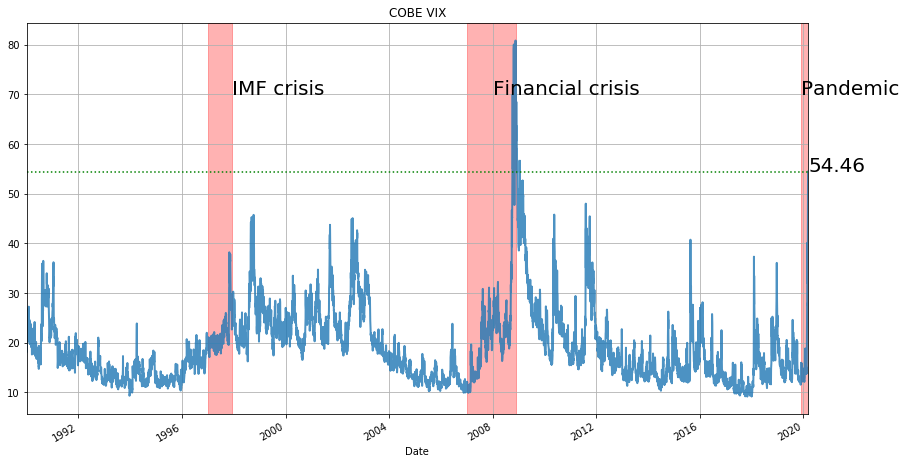

In [4]:
#@vix index
ax = vix['Close'].plot(lw=2, alpha=0.8, title='COBE VIX')

# 외환위기
ax.axvspan('1997-01', '1997-12', alpha=0.3, color='red') 
ax.annotate('IMF crisis', xy=('1997-12-03', 70), fontsize=20)

# 금융위기
ax.axvspan('2007-01', '2008-12', alpha=0.3, color='red') 
ax.annotate('Financial crisis', xy=('2008', 70), fontsize=20) 

# 팬데믹
ax.axvspan('2019-12', '2020-04', alpha=0.3, color='red') 
ax.annotate('Pandemic', xy=('2019-12', 70), fontsize=20) 

# 2020-03-09 VIX 4.46
ax.axhline(54.46, ls=':', c='g') # 51.55 (2020-03-09 VIX)
ax.annotate('54.46', xy=('2020-03-09', 54.46), fontsize=20)

2020년 1월 ~ 3월까지의 VIX 지수를 보면 2월 중순이후 급격하게 높아지는 것을 볼 수 있습니다. 

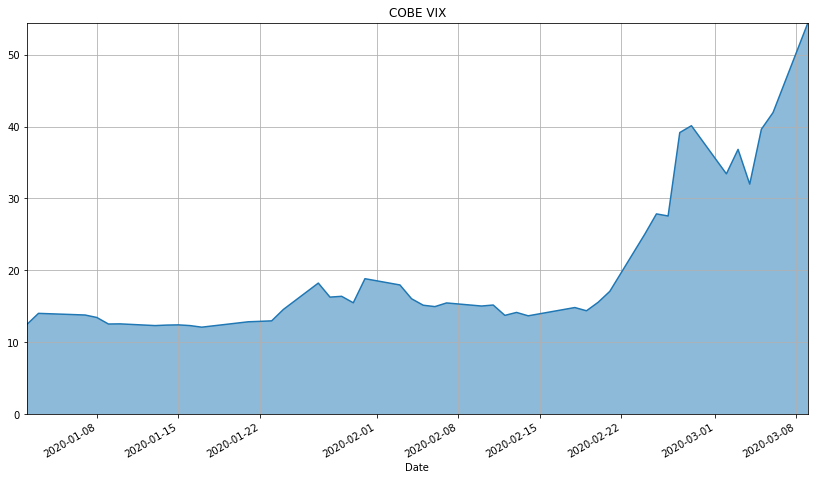

In [5]:
values = vix['2020-01-01':'2020-03-09']['Close']

ax = values.plot(figsize=(14,8), grid=True, title='COBE VIX')
ax.fill_between(values.index, 0, values, alpha=0.5)
ax.margins(0)

## VIX지수, S&P500지수, KOSPI지수 데이터

In [0]:
import FinanceDataReader as fdr

vix = fdr.DataReader('VIX', '2010-01-01', '2020-03-09') # S&P 500 VIX
kospi = fdr.DataReader('KS11', '2010-01-01', '2020-03-09') # KOSPI index
sp500 = fdr.DataReader('US500', '2010-01-01', '2020-03-09') # S&P 500 index

In [0]:
import pandas as pd

df = pd.concat([vix['Close'], kospi['Close'], sp500['Close']], axis=1)
df.columns = ['VIX', 'KOSPI', 'S&P500']

## S&P500지수와 VIX지수

S&P500지수와 VIX지수는 서로 반대로 움직이는 것을 확인할 수 있습니다.

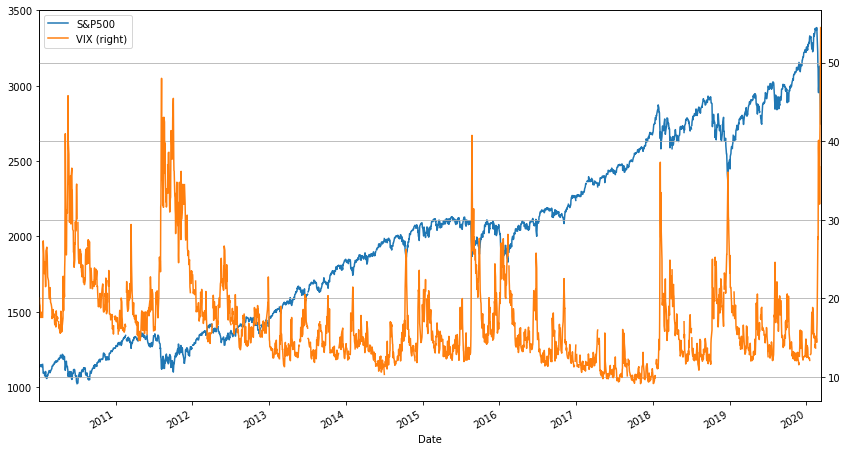

In [8]:
df[['S&P500', 'VIX']].plot(secondary_y='VIX')

## KOSPI지수와 VIX지수

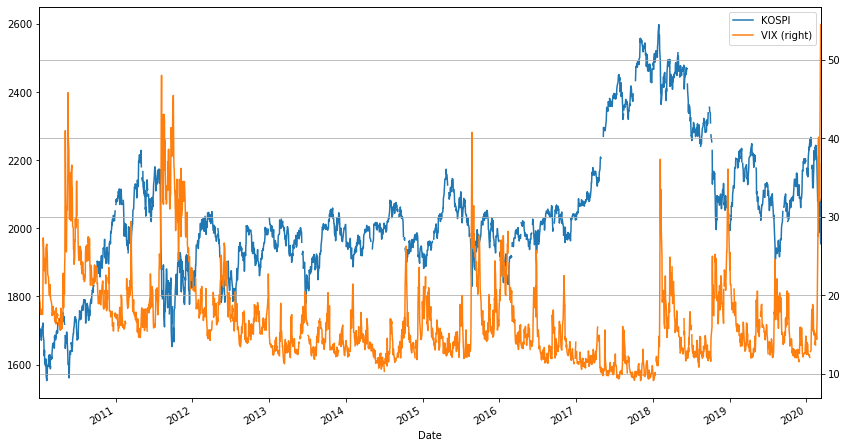

In [9]:
df[['KOSPI', 'VIX']].plot(secondary_y='VIX')

## VIX지수, S&P500지수, KOSPI지수 상관관계

In [10]:
df.corr()

,VIX,KOSPI,S&P500
VIX,1.000000,-0.514774,-0.439172
KOSPI,-0.514774,1.000000,0.704733
S&P500,-0.439172,0.704733,1.000000


KOSPI지수와 S&P500지수의 상관계수는 0.70으로 매우 높게 나타납니다.

VIX지수의 경우 S&P500지수와는 -0.439, KOSPI지수와는 -0.514로 역상관 관계가 나타납니다. VIX지수에 배팅한다는 것은 주식시장의 하락에 배팅을 한다는 의미가 됩니다.

## VIX 관련 종목
VIX 관련한 투자 가능한 종목들의 심볼과 가격들을 살펴봅니다.

### 국내 VIX관련 ETN
* `530065`: 삼성 S&P500 VIX S/T 선물 ETN(H) B 
* `500045`: 신한 S&P500 VIX S/T 선물 ETN B
* `550058`: QV S&P500 VIX S/T 선물 ETN B

#### 해외선물
* `VX`: S&P 500 VIX 선물 (해외선물)
 
#### 미국 ETF
* `VXX`: iPath Series B S&P 500 VIX Short-Term Futures ETN (NYSE)
* `VIXY`: ProShares VIX Short-Term Futures ETF (NYSE)
* `VIXM`: ProShares VIX Mid-Term Futures ETF (NYSE)
* `VIIX`: VelocityShares Daily Long VIX Short-Term ETN (NASDAQ)
* `VXZ`: iPath Series B S&P 500® VIX Mid-Term Futures ETN (NYSE)
* `XVZ`: iPath S&P 500 Dynamic VIX ETN (NYSE)
* `EVIX`: VelocityShares 1X Long VSTOXX Futures ETN  (NYSE)

`FinanceDataReader`를 통해 위 종목들의 가격 데이터를 모두 조회가 가능합니다.

## S&P 500 VIX 선물 (해외선물)

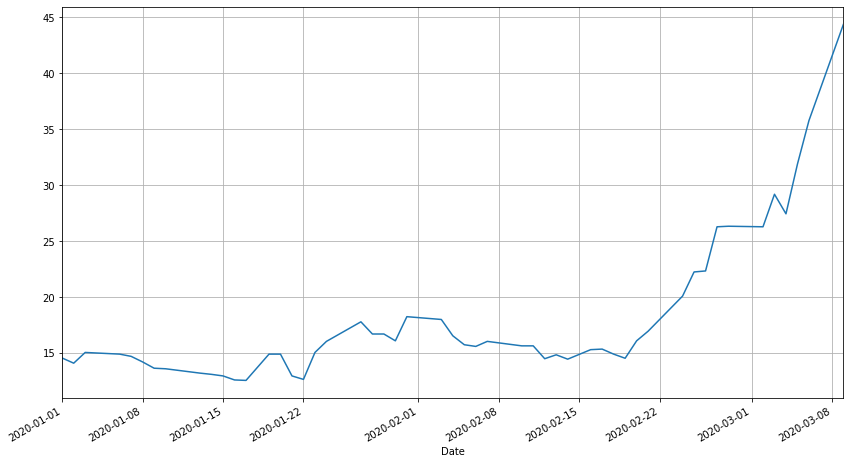

In [11]:
fdr.DataReader('VX', '2020-01-01', '2020-03-09')['Close'].plot()

## 삼성 S&P500 VIX S/T 선물 ETN(H) B (530065)
국내 VIX와 연계된 ETN 종목 하나를 살펴봅니다.

삼성 S&P500 VIX S/T 선물 ETN(H) B (코스피)

https://finance.naver.com/item/main.nhn?code=530065


In [12]:
fdr.DataReader('530065', '2020-01-01', '2020-03-09').tail(5)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-03-03,16395,17365,16310,17190,26338,0.020784
2020-03-04,18585,19000,17600,17775,35725,0.034031
2020-03-05,17750,18260,17750,18135,14610,0.020253
2020-03-06,19775,21385,19350,20975,40049,0.156603
2020-03-09,27220,27265,26225,27265,69397,0.299881


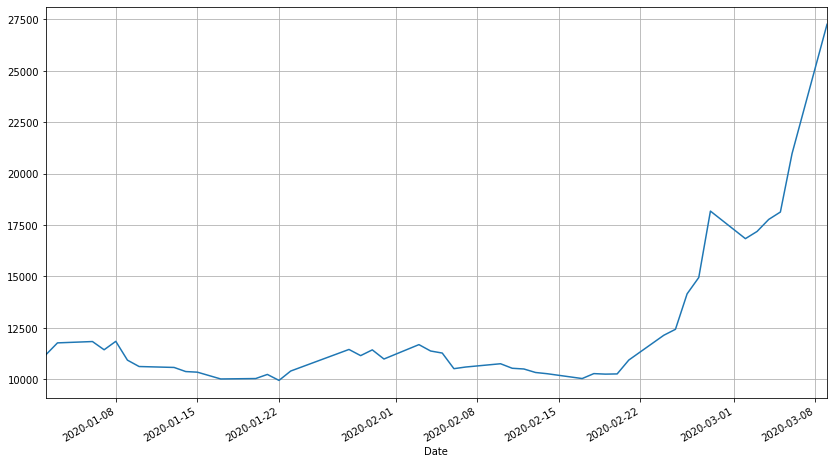

In [13]:
fdr.DataReader('530065', '2020-01-01', '2020-03-09')['Close'].plot()

In [0]:
price = fdr.DataReader('530065', '2020-01-01', '2020-03-09')['Close']

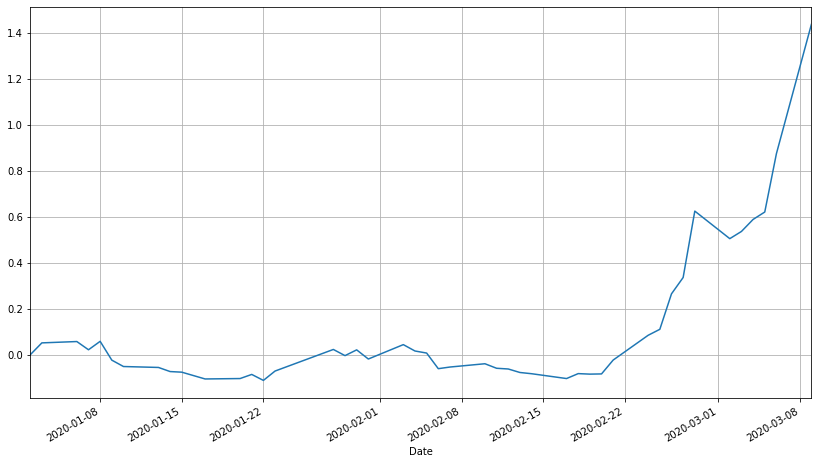

In [15]:
returns = price / price[0] - 1.0
returns.plot()

In [16]:
returns[-1]

1.436550491510277

530065 종목이 2020-03-09 상한가를 기록했습니다. 매우 이례적인 일입니다.

약 2개월 (2020-01-01 ~  2020-03-09) 수익률이 143.6% 입니다.

#### 2019~2020 [FinanceData.KR](http://financedata.kr) | [facebook.com/financedata](http://facebook.com/financedata)